<a href="https://colab.research.google.com/github/lsraei20/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/LS_DS_123_Confidence_Intervals_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Confidence Intervals

The following url can be used to access an abbreviated version of responses to Stack Overflow's 2018 Developer Survey. The original Survey had ~100k respondents but the data is quite dirty so I have selected a cleaner subset of it for you to use for your assignment.

<https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv>

The provided dataset holds 14 columns of information about individuals who make less than 500k per year and who responded that they had: 

"Participated in a full-time developer training program or bootcamp"

## Part 1 - Setting the Stage

**1) Load the dataset**

In [0]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/bootcampers.csv')
df.head(15)

,Unnamed: 0,Student,Employment,UndergradMajor,DevType,YearsCoding,YearsCodingProf,ConvertedSalary,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,LanguageWorkedWith,Gender,Age,RaceEthnicity
0,62,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Data scientist or machine l...,12-14 years,6-8 years,120000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C;F#;Haskell;Python;Scala,Male,25 - 34 years old,White or of European descent
1,73,No,Employed full-time,"A humanities discipline (ex. literature, histo...",Back-end developer;Full-stack developer;System...,0-2 years,0-2 years,36000.0,Participated in a full-time developer training...,The official documentation and/or standards fo...,Four to six months,Java;JavaScript;SQL;HTML;CSS;Bash/Shell,Male,25 - 34 years old,White or of European descent
2,127,"Yes, full-time",Employed full-time,"A business discipline (ex. accounting, finance...",Full-stack developer,3-5 years,3-5 years,59980.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C#;JavaScript;TypeScript;HTML;CSS,Male,25 - 34 years old,East Asian
3,140,No,Employed full-time,"A social science (ex. anthropology, psychology...",Data scientist or machine learning specialist;...,9-11 years,3-5 years,70000.0,Taken an online course in programming or softw...,Questions & answers on Stack Overflow;Tapping ...,I haven’t gotten a developer job,JavaScript;Python;SQL;VBA,Male,25 - 34 years old,White or of European descent
4,153,No,Employed full-time,"Computer science, computer engineering, or sof...",Mobile developer,6-8 years,3-5 years,105000.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,C;Java;JavaScript;Objective-C;PHP;Python;Ruby;...,Male,25 - 34 years old,White or of European descent
5,179,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Data or business analyst;Da...,9-11 years,9-11 years,72469.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,Immediately after graduating,Java;JavaScript;Lua;PHP;Python;Kotlin;HTML;CSS...,Male,25 - 34 years old,White or of European descent
6,241,No,Employed full-time,"Another engineering discipline (ex. civil, ele...",Back-end developer,3-5 years,3-5 years,33528.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,C++;Python;Bash/Shell,Male,25 - 34 years old,White or of European descent
7,286,No,Employed full-time,"A humanities discipline (ex. literature, histo...","Back-end developer;C-suite executive (CEO, CTO...",18-20 years,15-17 years,83342.0,Participated in a full-time developer training...,The official documentation and/or standards fo...,Six months to a year,C#;JavaScript;SQL;HTML;CSS,Male,35 - 44 years old,White or of European descent
8,300,No,Employed full-time,"Another engineering discipline (ex. civil, ele...",Back-end developer;Full-stack developer,3-5 years,0-2 years,72500.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,One to three months,Java;JavaScript;Perl;PHP;Python;Ruby;SQL;HTML;...,Male,25 - 34 years old,White or of European descent
9,324,No,Employed full-time,"Computer science, computer engineering, or sof...",Back-end developer;Mobile developer,18-20 years,9-11 years,126403.0,Taken an online course in programming or softw...,The official documentation and/or standards fo...,I already had a full-time job as a developer w...,Java;Python;Bash/Shell,Male,35 - 44 years old,East Asian


**2) Select two random samples from this dataset, one with a sample size of 20 and the other with a sample size of 200. (Use a `random_state` of `42` when selecting the samples)**

In [0]:
sample1 = df.sample(20, random_state=42)
sample2 = df.sample(200, random_state=42)

**3) Calculate and report the sample means of the `ConvertedSalary` column for both of the samples.**

In [0]:
sample1['ConvertedSalary'].mean()

55752.2

In [0]:
sample2['ConvertedSalary'].mean()

68551.255

**4) Both of these sample means are estimates of an underlying population value. Which sample mean do you trust more? Why? Would a non-technical audience have any idea about which of these values is more trustworthy?**

---Sample 2 would be more reliable because it is a bigger sample, therefore it is a more accurate representation of the whole population. If the audience is told which value had the most data, it would be common sense that the bigger one is more accurate.

**5) Does just the point estimate (individual value of the sample mean) indicate to you anything about how much sampling error there could be with these estimates?**

---At this point theres not enough data to estimate the sample error with just the mean values. We only know that 55752.2 and 68551.255 **might** be part of it depending on how big the sample is.

**6) What strategies could we use when reporting these numbers to not only report our estimates but also to give non-technical readers an idea about how far off our estimates might be due to sampling error?**



---Report the mean and the margin of error in a visual simle visual way like a graph.

## Part 2 - Reporting CIs / MOEs along with our point estimates for more context.

**1) Calculate and report a 95% confidence interval around both of the sample means from part 1.**



In [0]:
def confidence_interval(data, confidence=.95):
  n = len(data)
  s = data.std()
  sample = np.array(data)
  x_bar = sample.mean()
  t = stats.t.ppf(((1+confidence)/2) , (n-1))
  std_err = s / np.sqrt(n)
  moe = std_err * t
  upper = x_bar + moe
  lower = x_bar - moe
  return (lower, x_bar, upper)


In [0]:
ci = confidence_interval(sample1['ConvertedSalary'])

In [0]:
ci2 = confidence_interval(sample2['ConvertedSalary'])

**2) Which confidence interval is wider and why?**

The confidence interval of the first sample is much wider. Due to its lower sample size the standard error of our estimate is much larger causing the potential distribution of sample means to be much more spread out. A confidence interval catches 95% of this theoretical distriution of sample means so if our standard error is larger, our confidence interval will be wider as well.

**3) Report the mean and the margin of error for both of the sample means. What does the Margin of Error Represent?**

---sample1

mean is 55752.2

The margin of error contains values between 35805.10309625536 and 75699.29690374463

_________________________________________________

In [0]:
print('Converted Salary')
print('Mean', ci[1])
print('MOE', ci[1]-ci[0])

Converted Salary
Mean 55752.2
MOE 19947.096903744634


---sample 2

mean is 68551.255

The margin of error contains values between 60593.058804479086, 68551.255, 76509.45119552092

In [0]:
print('Converted Salary')
print('Mean', ci2[1])
print('MOE', ci2[1]-ci2[0])

Converted Salary
Mean 68551.255
MOE 7958.196195520919


The margin of error gives an idea of how far off our estimates might be (with 95% confidence). We're trying to supply a plausible range for our parameter of interest (the true average salary of bootcamp grads).

## Part 3 - Communicate the Precision of Sample Estimates Graphically

**1) Create a plot using `plt.errorbar` that compares both of the confidence intervals.** 

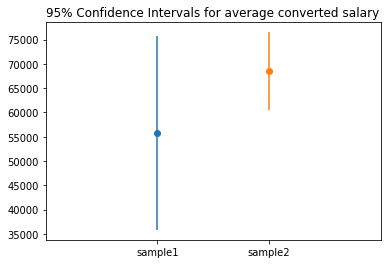

In [0]:
plt.errorbar(0, ci[1], yerr=(ci[2]-ci[1]), fmt='o')
plt.errorbar(1, ci2[1], yerr=(ci2[2]-ci2[1]), fmt='o')
plt.title('95% Confidence Intervals for average converted salary')
plt.xticks(ticks=[0,1], labels=['sample1', 'sample2'])
plt.xlim(-1,2)
plt.show()

**2) Create a plot using `plt.bar` that compares both of the confidence intervals.**

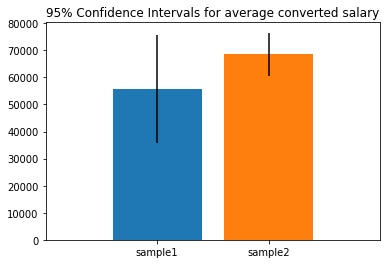

In [0]:
plt.bar(0, height = ci[1], yerr=(ci[2]-ci[1]))
plt.bar(1, height = ci2[1], yerr=(ci2[2]-ci2[1]))
plt.title('95% Confidence Intervals for average converted salary')
plt.xticks(ticks=[0,1], labels=['sample1', 'sample2'])
plt.xlim(-1,2)
plt.show()

## Part 4 - Check for Understanding







**Calculate a Confidence Interval using the entire dataset. How precise do our estimates get?**

In [0]:
cit = confidence_interval(df['ConvertedSalary'])
#our estimates get very precise at a Margin of error of only
cit[1]-cit[0]

2153.5743391284486

**What does "precision" mean in the context of statistical estimates and how is that different from "accuracy?"**

---Precision means how close in values are between them.

Accuracy means how close the values are to the true value.

**It is very common to misunderstand what is captured by a 95% confidence interval. What is the correct interpretation? ([Hint](https://www.statisticssolutions.com/misconceptions-about-confidence-intervals/))**

For every 100 confidence interval tests made from different samples with the same sample size, 95 of them will contain the true population mean.

# Stretch Goals:

1) Study the relationship between t-tests and confidence intervals.
 - Find a sample mean that we have worked with and construct a 95% confidence interval around it. (find the lower and upper bounds)
 - Run a 1-sample t-test with the null hypothesis value being just barely **outside** of the confidence interval. What is the p-value?
 - Run a 1-sample t-test with the null hypothesis value being just barely **inside** of the confidence interval. What is the p-value?

  What does it mean when we say that the boundaries of the confidence interval are the boundaries of statistical significance in a 1-sample t-test?


2) Go back to our [congressional voting dataset](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records) and build confidence intervals around the means of all of the issues for a single party. Compare all of those confidence intervals graphically on a single graph. 

3) Dive deeper into the [2018 Stack Overflow Survey](https://www.kaggle.com/stackoverflow/stack-overflow-2018-developer-survey) results to see what cool things you can find.